In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [170]:
path = 'english-alphabets'

In [171]:
folders = []
for i in os.listdir(path):
    folders.append(os.path.join(path, i))

In [172]:
folders

['english-alphabets/M',
 'english-alphabets/X',
 'english-alphabets/J',
 'english-alphabets/V',
 'english-alphabets/W',
 'english-alphabets/Y',
 'english-alphabets/G',
 'english-alphabets/H',
 'english-alphabets/S',
 'english-alphabets/B',
 'english-alphabets/L',
 'english-alphabets/U',
 'english-alphabets/D',
 'english-alphabets/C',
 'english-alphabets/A',
 'english-alphabets/Z',
 'english-alphabets/I',
 'english-alphabets/R',
 'english-alphabets/T',
 'english-alphabets/K',
 'english-alphabets/F',
 'english-alphabets/E',
 'english-alphabets/O',
 'english-alphabets/P',
 'english-alphabets/Q',
 'english-alphabets/N']

In [173]:
img_paths = []
for folder in folders:
    for img_path in os.listdir(folder):
        img_paths.append(os.path.join(folder, img_path))

In [174]:
#img_paths

In [175]:
len(img_paths)

6848

In [176]:
import cv2

In [177]:
import numpy as np

In [178]:
data = []
for i in img_paths:
    im = cv2.imread(i)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    np_im = np.array(im)
    data.append(np_im)

In [179]:
#data

In [180]:
label = img_paths[0]

In [181]:
label.find('M')

18

In [182]:
labels = []
for i in img_paths:
    labels.append(i[18])

In [183]:
labels = [ord(i) for i in labels]

In [184]:
#labels

In [185]:
for index,label in enumerate(labels):
    if label == 86:
        value = index
        break

In [186]:
value

761

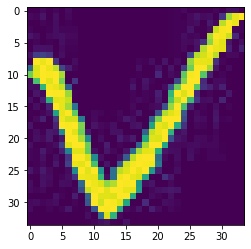

In [187]:
plt.imshow(data[value])

In [188]:
data = np.array(data)

In [189]:
data.shape

(6848, 34, 34)

In [190]:
data = data.reshape(6848, 34*34)

In [191]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.1, random_state=20)

In [192]:
train_data.shape

(6163, 1156)

In [193]:
model = neighbors.KNeighborsClassifier(n_neighbors=4, weights='distance')

In [195]:
#del model

In [196]:
model.fit(train_data,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [608]:
y_pred1 = model.predict(test_data)

In [609]:
print("Accuracy :{}".format(100*accuracy_score(test_labels, y_pred1)))

Accuracy :84.67153284671532


In [224]:
import pickle

In [607]:
pickle.dump(model, open('finalized_model.sav', 'wb'))

### Load model

In [192]:
import pickle

In [540]:
model = pickle.load(open('finalized_model.sav', 'rb'))

In [594]:
img = 'test.jpg'

In [595]:
import cv2
import numpy as np

In [596]:
img = cv2.imread(img)
#img = cv2.resize(img, (300,300))

In [597]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [598]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [599]:
cv2.imshow('image', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [600]:
blur = cv2.GaussianBlur(gray,(5,5),0)

In [601]:
cv2.imshow('image', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [602]:
im,thre = cv2.threshold(blur,127,255,cv2.THRESH_BINARY_INV)

In [603]:
cv2.imshow('image', thre)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [604]:
contours, hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

In [605]:
idx = 0
for i in contours:
    (x,y,w,h) = cv2.boundingRect(i)
    if w>15 and h>15:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
        new_img=thre[y:y+h,x:x+w]
        new_img = cv2.resize(new_img,(34,34))
        cv2.imwrite(str(idx) + '.png', new_img)
        idx += 1
        np_img = np.array(new_img)
        np_img = np_img.reshape(-1,(34*34))
        pre = model.predict(np_img)
        pre = chr(pre)
        cv2.putText(img, pre, (x, y),cv2.FONT_HERSHEY_DUPLEX,1,(255,0,0),1)

In [606]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [538]:
cv2.imwrite('result_my_letter2.jpg',img)

True